In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import keras
import tensorflow as tf
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from tensorflow.keras.applications import VGG19
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input

In [2]:
classnames=['COVID','NORMAL','Viral_Pneumonia']

In [ ]:
# Transfer learning_Model_(VGG19)

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [299, 299]



# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  
x = Flatten()(vgg.output)

prediction = Dense(3, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

model.compile(loss='categorical_crossentropy',optimizer = "adam",metrics = ['acc'])

# view the structure of the model
model.summary()

In [5]:

# Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
training_set = train_datagen.flow_from_directory('DATASET/TRAIN',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',classes=classnames)

Found 4500 images belonging to 3 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        'DATASET/TEST',
        target_size=(299, 299),
        batch_size=32,
        class_mode='categorical',classes=classnames)

Found 1045 images belonging to 3 classes.


In [8]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
lr = 1e-4
num_epochs = 100
model_path = os.path.join("files", "model.h5")
csv_path = os.path.join("files", "data.csv")

In [10]:
callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, min_lr=1e-6, verbose=1),
        CSVLogger(csv_path),
        TensorBoard()]
history=model.fit_generator(training_set, 
        epochs=50,
        validation_data = test_set,
        callbacks=callbacks)

C:\Users\CSE AI\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == "__main__":


Epoch 1/50
141/141 [==============================] - ETA: 0s - loss: 0.1715 - acc: 0.9364
Epoch 1: val_loss improved from inf to 0.34160, saving model to files\model.h5
141/141 [==============================] - 77s 546ms/step - loss: 0.1715 - acc: 0.9364 - val_loss: 0.3416 - val_acc: 0.8766 - lr: 0.0010
Epoch 2/50
141/141 [==============================] - ETA: 0s - loss: 0.1773 - acc: 0.9380
Epoch 2: val_loss improved from 0.34160 to 0.25344, saving model to files\model.h5
141/141 [==============================] - 77s 543ms/step - loss: 0.1773 - acc: 0.9380 - val_loss: 0.2534 - val_acc: 0.8947 - lr: 0.0010
Epoch 3/50
141/141 [==============================] - ETA: 0s - loss: 0.1990 - acc: 0.9304
Epoch 3: val_loss did not improve from 0.25344
141/141 [==============================] - 76s 539ms/step - loss: 0.1990 - acc: 0.9304 - val_loss: 0.2590 - val_acc: 0.9043 - lr: 0.0010
Epoch 4/50
141/141 [==============================] - ETA: 0s - loss: 0.1692 - acc: 0.9396
Epoch 4: val_los

Epoch 29/50
141/141 [==============================] - ETA: 0s - loss: 0.0769 - acc: 0.9696
Epoch 29: val_loss did not improve from 0.19384
141/141 [==============================] - 108s 767ms/step - loss: 0.0769 - acc: 0.9696 - val_loss: 0.3184 - val_acc: 0.8890 - lr: 1.0000e-06
Epoch 30/50
141/141 [==============================] - ETA: 0s - loss: 0.0735 - acc: 0.9742
Epoch 30: val_loss did not improve from 0.19384
141/141 [==============================] - 75s 533ms/step - loss: 0.0735 - acc: 0.9742 - val_loss: 0.3199 - val_acc: 0.8890 - lr: 1.0000e-06
Epoch 31/50
141/141 [==============================] - ETA: 0s - loss: 0.0678 - acc: 0.9740
Epoch 31: val_loss did not improve from 0.19384
141/141 [==============================] - 76s 534ms/step - loss: 0.0678 - acc: 0.9740 - val_loss: 0.3221 - val_acc: 0.8890 - lr: 1.0000e-06
Epoch 32/50
141/141 [==============================] - ETA: 0s - loss: 0.0737 - acc: 0.9718
Epoch 32: val_loss did not improve from 0.19384
141/141 [=======

In [11]:
print(history.history.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


In [12]:
import matplotlib.image as mpimg

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


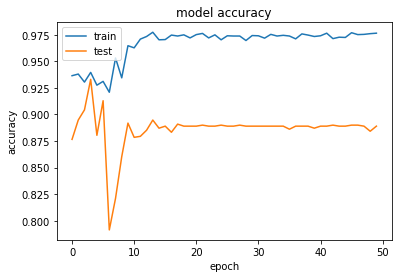

In [13]:
print(history.history.keys())
import matplotlib.pyplot as plt
# summarize model for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

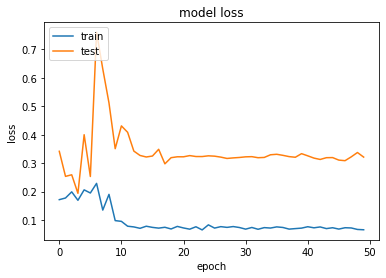

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
path ="Normal-42.png"
img = image.load_img(path, target_size=(299,299))
img = image.img_to_array(img)/255
img = np.array([img])
img.shape

In [ ]:
path ="Normal-"
for i in range(41, 50) :
    path = "Normal-" + str(i) + ".png"
    img = image.load_img(path, target_size=(299,299))
    img = image.img_to_array(img)/255
    img = np.array([img])
    predictions=(model.predict(img))
    print(predictions)
    predictions = (predictions>0.5).astype("int32")
    if predictions==1:
      print("NORMAL")
    else:
      print("SOME COVID SYMPTOMS ARE DETECTED IN PATIENTS XRAY")